In [1]:
import fastbook

In [2]:
fastbook.setup_book()

In [3]:
from fastbook import *

In [4]:
path = Path('.\dataset')

In [5]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [6]:
dls = bears.dataloaders(path)

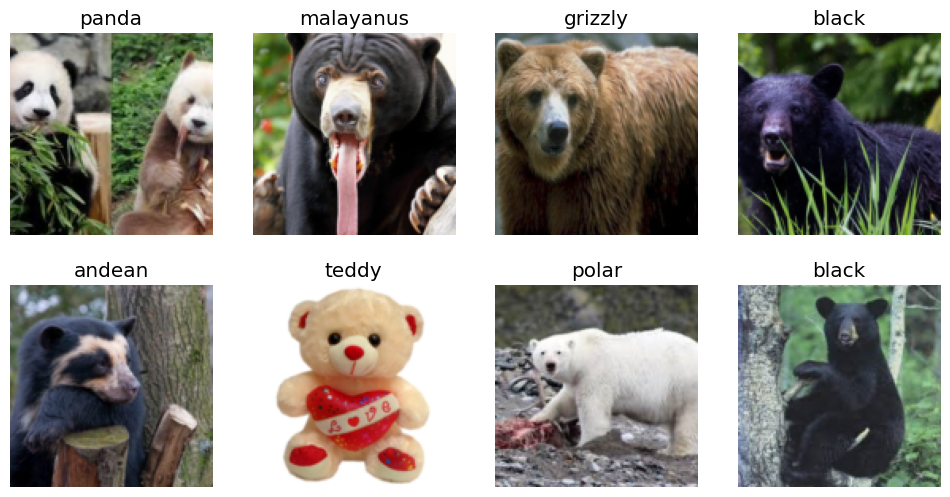

In [7]:
dls.valid.show_batch(max_n=8, nrows=2)

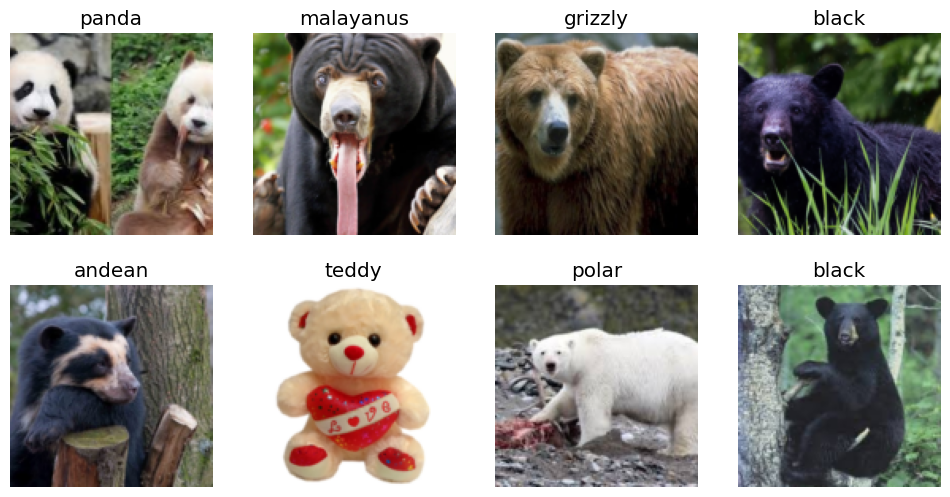

In [8]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

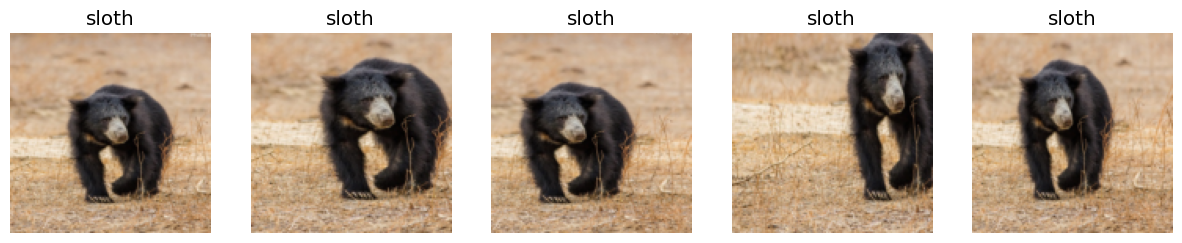

In [9]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path,bs=5)
dls.train.show_batch(max_n=6, nrows=1, unique=True)

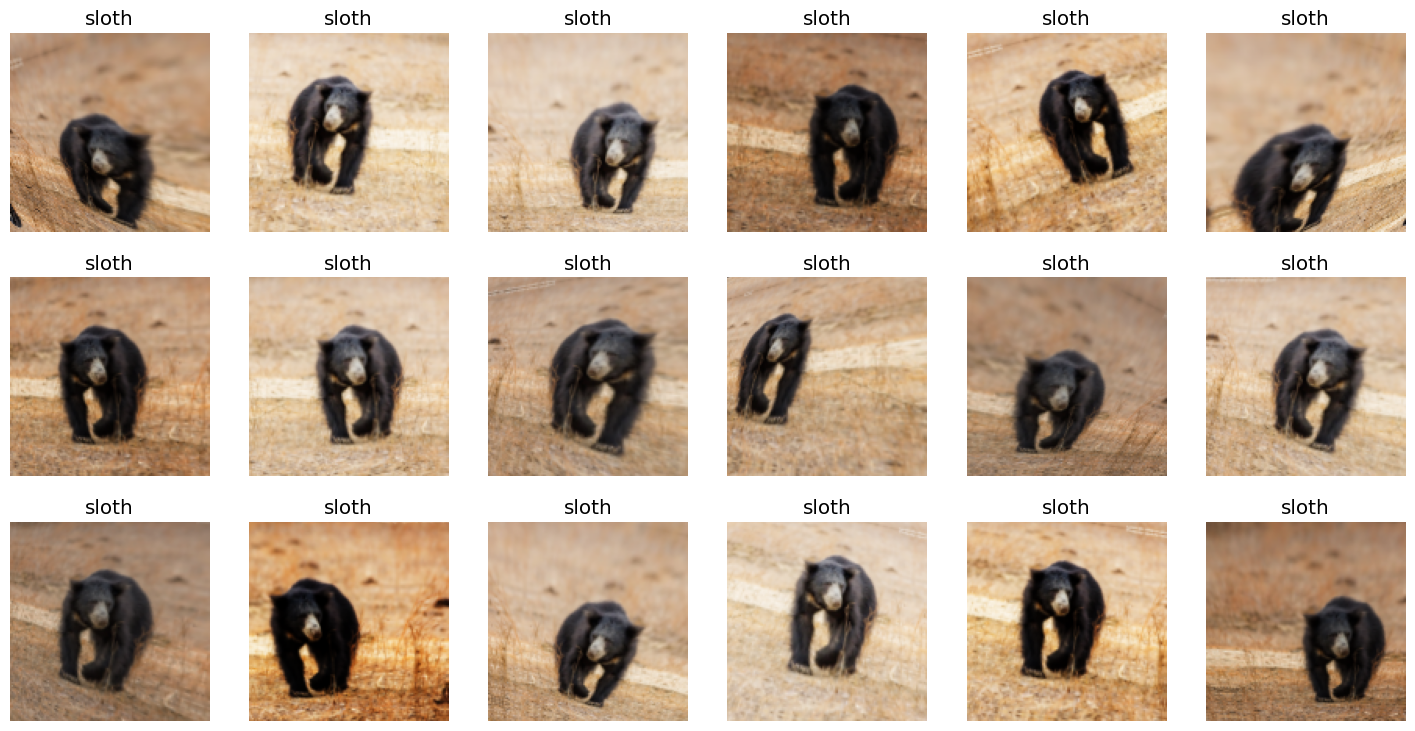

In [10]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path,bs=64)
dls.train.show_batch(max_n=18, nrows=3, unique=True)

In [11]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [13]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.650682,0.206287,0.939189,01:18


c:\Users\bonru\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.273028,0.115213,0.966216,01:39
1,0.222535,0.107039,0.969595,01:38
2,0.166716,0.091874,0.983108,01:42
3,0.138558,0.087087,0.983108,01:32


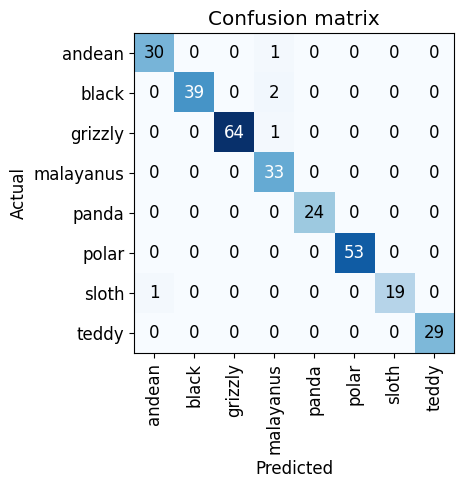

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

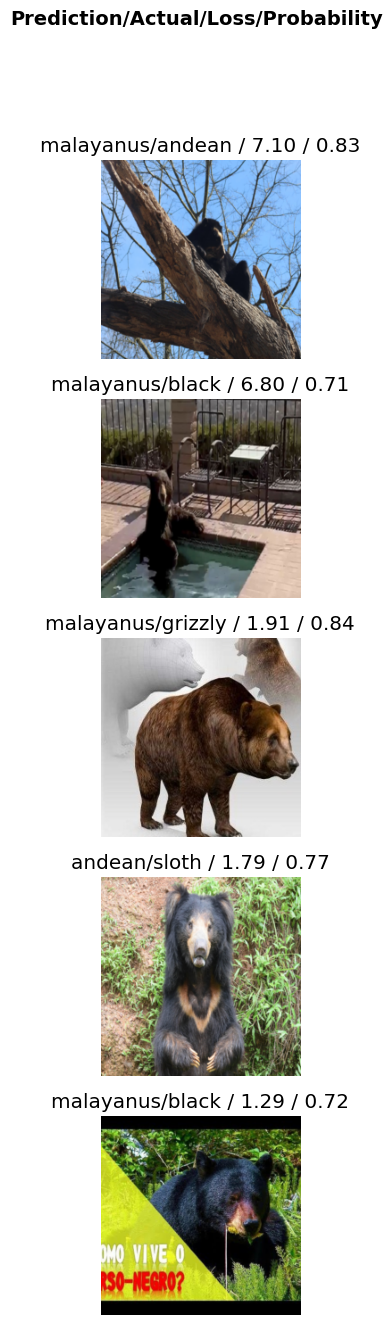

In [15]:
interp.plot_top_losses(5, nrows=5)

In [26]:
learn.save('model-pytorch')

Path('models/model-fastbook.pth')